## NOTE
#### CHECK POITNS GENERATED FORM 800 / _800 EPOCH CODE AND 200 EPOCH CODE USING FINE TUNED MODEL
#### PSEUDO  LABELS GENERATED FORM 800 EPOCH CODE USING THE LABEL GENRATING AND SAVING CODE


# 1

#### loading the model

In [62]:
import torch
import torchvision.models as models

# Define the MoCo v2 model architecture (e.g., ResNet-50)
model = models.resnet50(pretrained=False)  # Set pretrained=False since we are loading custom weights

# Load the pre-trained weights from the .pth file
checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\other\moco_v2_200ep_pretrain.pth', map_location='cpu')

# Load the weights into the model
model.load_state_dict(checkpoint['state_dict'], strict=False)  # Adjust 'state_dict' key as per your .pth file
model.eval()  # Set the model to evaluation mode

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Divyank\AppData\Local\Temp\ipykernel_18952\2107642761.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default val

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#### loading the data set

In [63]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match the input size of the model
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [64]:
import torch.nn as nn

# Replace the final fully connected layer
num_classes = 2  # Change this based on your task (e.g., 2 for binary classification)
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
s

#### commplete code with next step

In [66]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model architecture (e.g., ResNet-50)
model = models.resnet50(pretrained=False)  # Set pretrained=False since we are loading custom weights

# Load the pre-trained MoCo v2 weights
checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\other\moco_v2_800ep_pretrain.pth', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'], strict=False)  # Adjust 'state_dict' key as per your .pth file

# Move the model to the appropriate device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        features_q = model(images_q)
        features_k = model(images_k)

        # Compute contrastive loss
        loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')

# ============================================================
# Step 1: Extract features from the trained model
# ============================================================
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

# Extract features
features = extract_features(model, dataloader, device)

# ============================================================
# Step 2: Generate pseudo-labels using KMeans clustering
# ============================================================
num_clusters = 5  # Adjust the number of clusters based on your task
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(features)

# ============================================================
# Step 3: Train a supervised model using pseudo-labels
# ============================================================
# Define a supervised classification model
class DeforestationClassifier(nn.Module):
    def __init__(self, backbone, num_classes):
        super(DeforestationClassifier, self).__init__()
        self.backbone = backbone  # SSL model (e.g., MoCo v2)
        # Replace the final fully connected layer of the backbone
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)  # Pass through the backbone and classification head

# Initialize the supervised model
num_classes = num_clusters  # Number of clusters = number of classes
classifier = DeforestationClassifier(model, num_classes)
classifier.to(device)

# Define a supervised loss function
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Create a labeled dataset using pseudo-labels
class LabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, pseudo_labels, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.pseudo_labels = pseudo_labels  # Pseudo-labels from SSL
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        label = self.pseudo_labels[idx]  # Get the pseudo-label
        return image, label  # Return both image and pseudo-label

labeled_dataset = LabeledDeforestationDataset(image_dir, pseudo_labels, transform=transform)
labeled_dataloader = DataLoader(labeled_dataset, batch_size=32, shuffle=True)

# Training loop for the supervised model
num_epochs_supervised = 25  # Adjust based on your needs
for epoch in range(num_epochs_supervised):
    classifier.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(labeled_dataloader, desc=f'Epoch [{epoch+1}/{num_epochs_supervised}]', leave=False)

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = classifier(images)
        labels = labels.long()  # Ensure labels are int64
        loss = criterion(outputs, labels)


        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(labeled_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs_supervised}], Loss: {epoch_avg_loss:.4f}')

# ============================================================
# Step 4: Evaluate the supervised model (optional)
# ============================================================
classifier.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in labeled_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the training set: {accuracy:.2f}%')

C:\Users\Divyank\AppData\Local\Temp\ipykernel_18952\563423865.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\oth

Epoch [1/25], Loss: 0.7504


Epoch [2/25], Loss: 0.5215


Epoch [3/25], Loss: 0.5222


Epoch [4/25], Loss: 0.1947


Epoch [5/25], Loss: 0.3396


Epoch [6/25], Loss: 0.1828


Epoch [7/25], Loss: 0.3413


Epoch [8/25], Loss: 0.1112


Epoch [9/25], Loss: 0.2681


Epoch [10/25], Loss: 0.0762


Epoch [11/25], Loss: 0.2966


Epoch [12/25], Loss: 0.1366


Epoch [13/25], Loss: 0.0785


Epoch [14/25], Loss: 0.0143


Epoch [15/25], Loss: 0.0353


Epoch [16/25], Loss: 0.0705


Epoch [17/25], Loss: 0.0665


Epoch [18/25], Loss: 0.1078


Epoch [19/25], Loss: 0.1649


Epoch [20/25], Loss: 0.0787


Epoch [21/25], Loss: 0.0541


Epoch [22/25], Loss: 0.0669


Epoch [23/25], Loss: 0.2057


Epoch [24/25], Loss: 0.1211


Epoch [25/25], Loss: 0.3835


c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Epoch [1/25], Loss: 2.0647


Epoch [2/25], Loss: 0.3272


Epoch [3/25], Loss: 3.2036


Epoch [4/25], Loss: 2.2510


Epoch [5/25], Loss: 4.3471


Epoch [6/25], Loss: 0.8095


Epoch [7/25], Loss: 2.7788


Epoch [8/25], Loss: 2.9035


Epoch [9/25], Loss: 2.1998


Epoch [10/25], Loss: 1.6480


Epoch [11/25], Loss: 0.7715


Epoch [12/25], Loss: 3.3630


Epoch [13/25], Loss: 1.5671


Epoch [14/25], Loss: 6.2741


Epoch [15/25], Loss: 2.9245


Epoch [16/25], Loss: 0.9685


Epoch [17/25], Loss: 2.2995


Epoch [18/25], Loss: 1.4611


Epoch [19/25], Loss: 4.4195


Epoch [20/25], Loss: 1.9865


Epoch [21/25], Loss: 1.9655


Epoch [22/25], Loss: 1.1733


Epoch [23/25], Loss: 1.3089


Epoch [24/25], Loss: 1.7709


Epoch [25/25], Loss: 1.3067
Accuracy of the model on the training set: 20.00%


# same code with evaluation and plots

In [67]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE  # For feature visualization
from sklearn.cluster import KMeans  # For clustering

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        features_q = model(images_q)
        features_k = model(images_k)

        # Compute contrastive loss
        loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')



###########################################################################################################################




Epoch [1/25], Loss: 0.1449


Epoch [2/25], Loss: 0.0924


Epoch [3/25], Loss: 0.2105


Epoch [4/25], Loss: 0.2983


Epoch [5/25], Loss: 0.1739


Epoch [6/25], Loss: 0.1305


Epoch [7/25], Loss: 0.5113


Epoch [8/25], Loss: 0.0002


Epoch [9/25], Loss: 0.5508


Epoch [10/25], Loss: 0.0161


Epoch [11/25], Loss: 0.3942


Epoch [12/25], Loss: 0.2167


Epoch [13/25], Loss: 0.6059


Epoch [14/25], Loss: 0.0033


Epoch [15/25], Loss: 0.0049


Epoch [16/25], Loss: 0.1899


Epoch [17/25], Loss: 0.0003


Epoch [18/25], Loss: 0.0308


Epoch [19/25], Loss: 0.0174


Epoch [20/25], Loss: 0.0383


Epoch [21/25], Loss: 0.0106


Epoch [22/25], Loss: 0.0482


Epoch [23/25], Loss: 0.0847


Epoch [24/25], Loss: 0.2375


Epoch [25/25], Loss: 0.2792


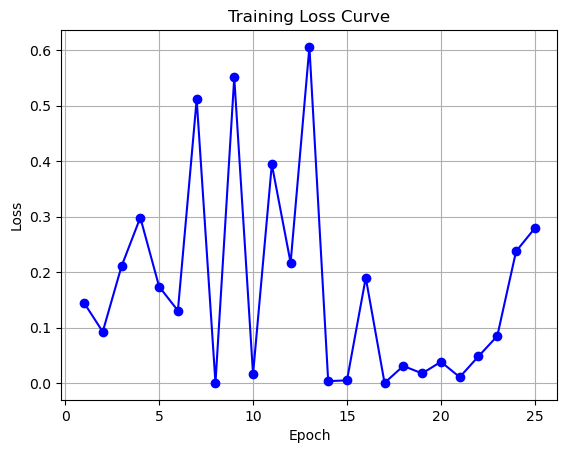

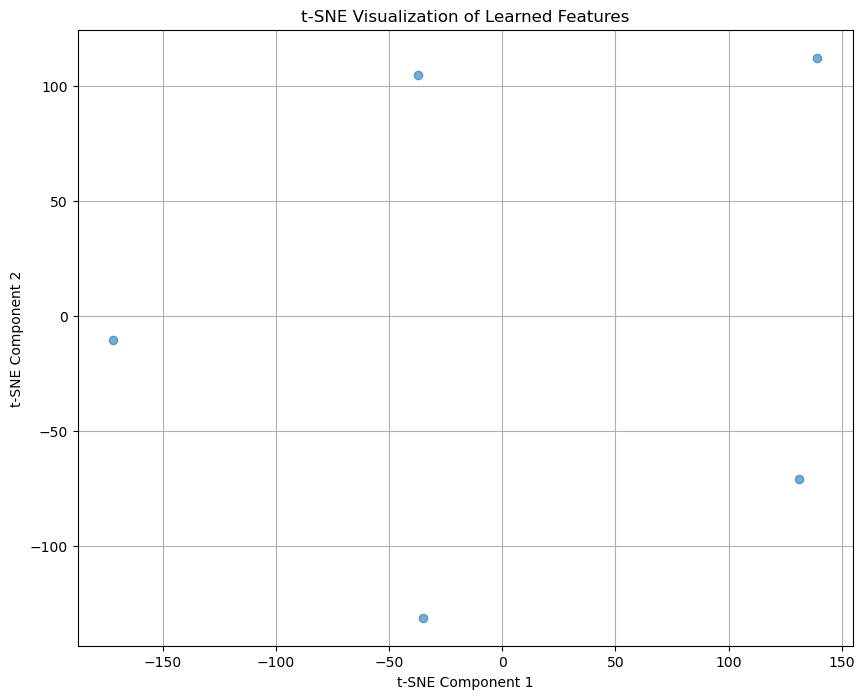

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


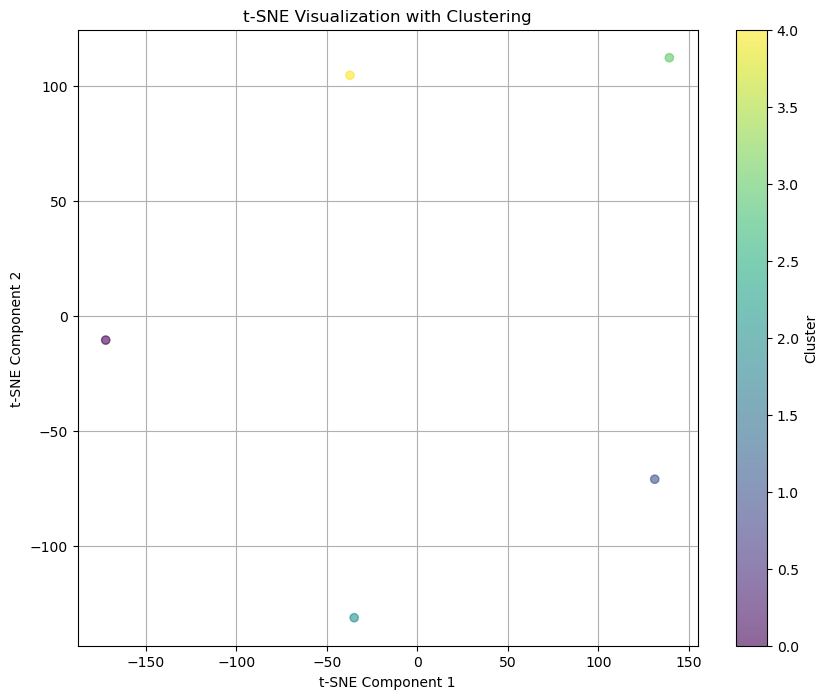

In [69]:
# Plot the loss curve
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

# Evaluation: Feature Extraction and Visualization
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

# Extract features from the trained model
features = extract_features(model, dataloader, device)

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=min(30, len(features) - 1), random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of Learned Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(features)

# Plot t-SNE with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization with Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display a grid of sample images
def show_image_grid(dataloader, num_images=16):
    images = next(iter(dataloader))[:num_images]  # Get a batch of images
    images = images.cpu()  # Move images to CPU for visualization

    # Reverse normalization for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    images = images * std + mean  # Reverse normalization
    images = images.clamp(0, 1)  # Clamp values to [0, 1]

    # Plot the images in a grid
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()
